In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
sns.set() 
import warnings
warnings.filterwarnings('ignore')

In [2]:
rand_state=1000

In [3]:
df=pd.read_csv('weight-height.csv')

In [4]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8555 entries, 0 to 8554
Data columns (total 3 columns):
Gender    8555 non-null object
Height    8555 non-null float64
Weight    8555 non-null float64
dtypes: float64(2), object(1)
memory usage: 200.6+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Height,8555.0,66.809925,3.851454,54.616858,63.957684,66.985923,69.604427,80.450000
Weight,8555.0,165.632735,32.043922,65.780000,139.876803,168.521567,190.666305,269.989698


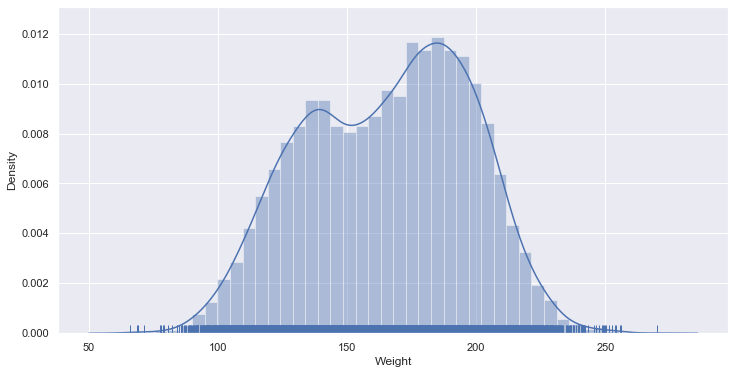

In [7]:
plt.figure(figsize=(12,6))
sns.distplot(df['Weight'],rug=True)
plt.show()

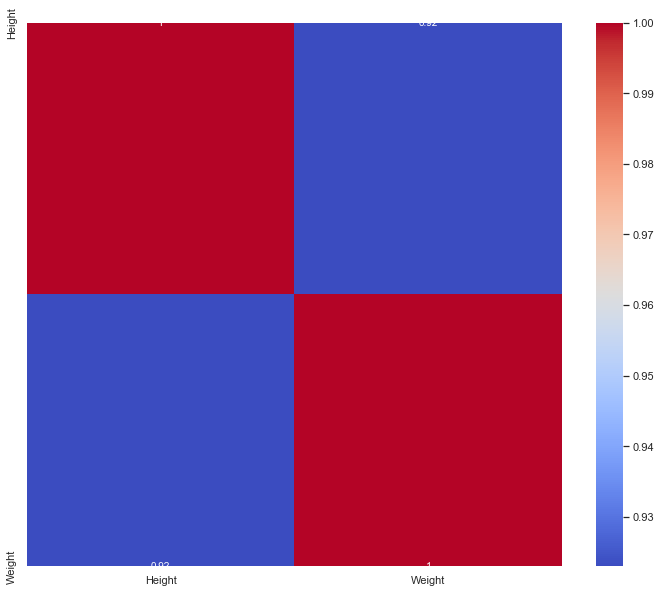

In [8]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

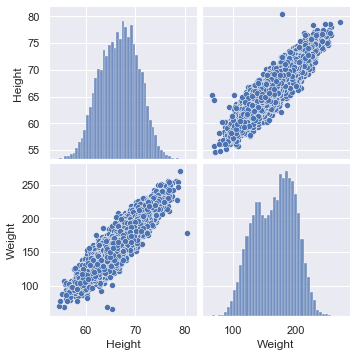

In [9]:
sns.pairplot(df[['Height','Weight']])
plt.show()

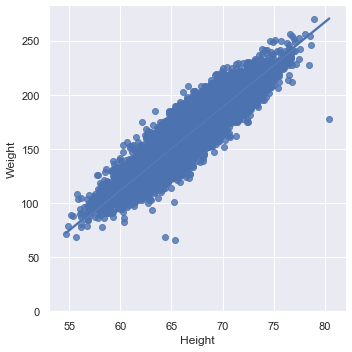

In [10]:
g=sns.lmplot(x='Height',y='Weight',data=df)
g.set(ylim=(0,None))
plt.show()

# Train and Test set Split

In [11]:
x=df[['Height']]
y=df['Weight']

In [12]:
from sklearn.model_selection import train_test_split as tts
xtrain,xtest,ytrain,ytest=tts(x,y,test_size=.3,random_state=rand_state)
np.round(len(xtrain)/len(x),3)

0.7

In [13]:
xtrain.head()

,Height
1946,68.446192
6481,60.176538
2893,69.605883
4721,75.330847
3418,67.393229


In [14]:
ytrain.head()

1946    199.382881
6481    109.258420
2893    187.531900
4721    240.440816
3418    185.556555
Name: Weight, dtype: float64

# Linear Regression with Scikit-Learn

In [15]:
from sklearn.linear_model import LinearRegression
reg_model=LinearRegression()

In [16]:
reg_model.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
m=reg_model.coef_
m

array([7.65730608])

In [18]:
c=reg_model.intercept_
c

-345.8051590475792

In [19]:
x1=60
y=m*x1+c
y

array([113.63320557])

In [20]:
reg_model.predict([[60]])

array([113.63320557])

In [21]:
pred=reg_model.predict(xtest)

In [22]:
pred

array([173.3758432 , 147.35041337, 193.17672642, ..., 164.7435037 ,
       182.48752998, 150.4153986 ])

In [23]:
df['predicted result']=reg_model.predict(x)

In [24]:
df.head()

,Gender,Height,Weight,predicted result
0,Male,73.847017,241.893563,219.664053
1,Male,68.781904,162.310473,180.878933
2,Male,74.110105,212.740856,221.678601
3,Male,71.730978,220.042470,203.460898
4,Male,69.881796,206.349801,189.301141


In [25]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [26]:
mse=mean_squared_error(ytest,pred)
mse

143.30507127467706

In [27]:
mae=mean_absolute_error(ytest,pred)
mae

9.559260487224977

In [28]:
reg_model.score(xtest,ytest)

0.862797404219721

# KNN Regression with Sklearn

In [29]:
from sklearn.neighbors import KNeighborsRegressor

In [30]:
knn=KNeighborsRegressor(n_neighbors=5)
knn.fit(xtrain,ytrain)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [31]:
pred1 = knn.predict(xtest)

In [32]:
pred1

array([172.6728495 , 139.16126982, 189.8616625 , ..., 172.19924492,
       189.52319484, 152.1924298 ])

In [33]:
knn.predict([[60]])

array([114.18567066])

In [34]:
df['knn predicted result']=knn.predict(x)

In [35]:
df.head()

,Gender,Height,Weight,predicted result,knn predicted result
0,Male,73.847017,241.893563,219.664053,221.325348
1,Male,68.781904,162.310473,180.878933,181.686993
2,Male,74.110105,212.740856,221.678601,216.297056
3,Male,71.730978,220.042470,203.460898,202.632591
4,Male,69.881796,206.349801,189.301141,194.285950


In [36]:
knn.score(xtest,ytest)

0.8371924635213805

In [39]:
MSE_test = round(np.mean(np.square(ytest - pred1)),2)
MSE_test

170.05

In [40]:
RMSE_test = round(np.sqrt(MSE_test),2)
RMSE_test

13.04

# Cross validation

In [41]:
from sklearn.model_selection import cross_val_score

In [52]:
NMSE = cross_val_score(estimator = knn,x=xtrain, y=ytrain, cv = 5 , scoring="neg_mean_squared_error" )

TypeError: cross_val_score() got an unexpected keyword argument 'x'